<h3><font color='blue'> Importing Intel Library </font></h3>

<i>- We are running this intel patch in the begining so all the sklearn libraries imported will have intel extension for faster processing </i>

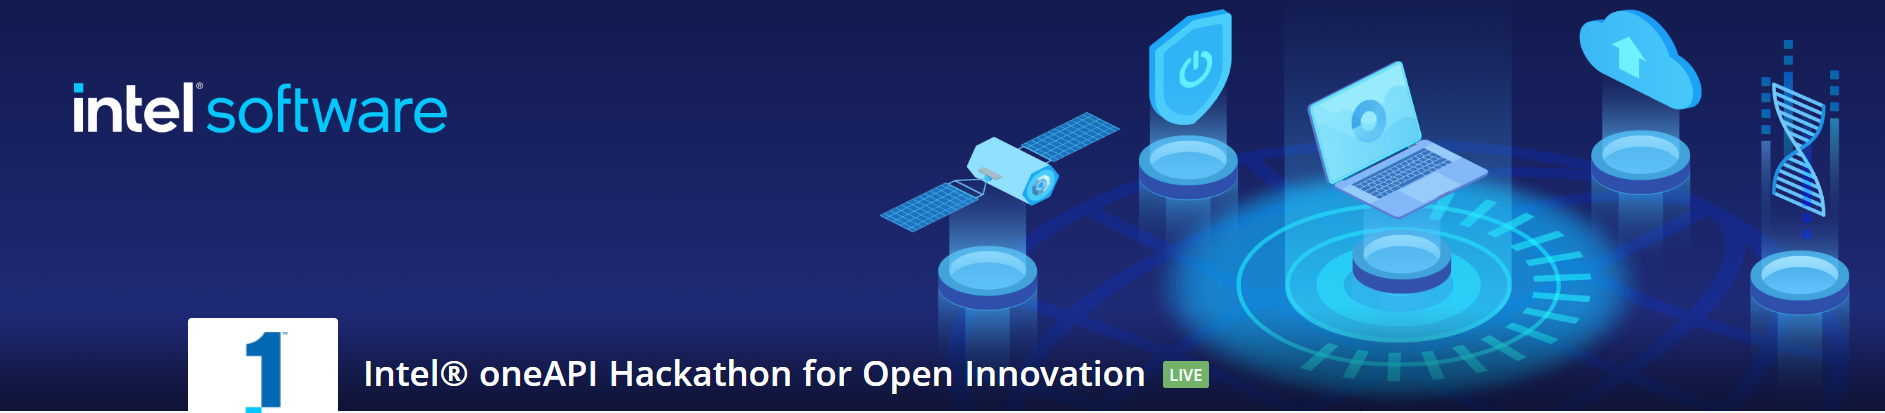

In [4]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Importing All the Libraries </font></h3>

In [5]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

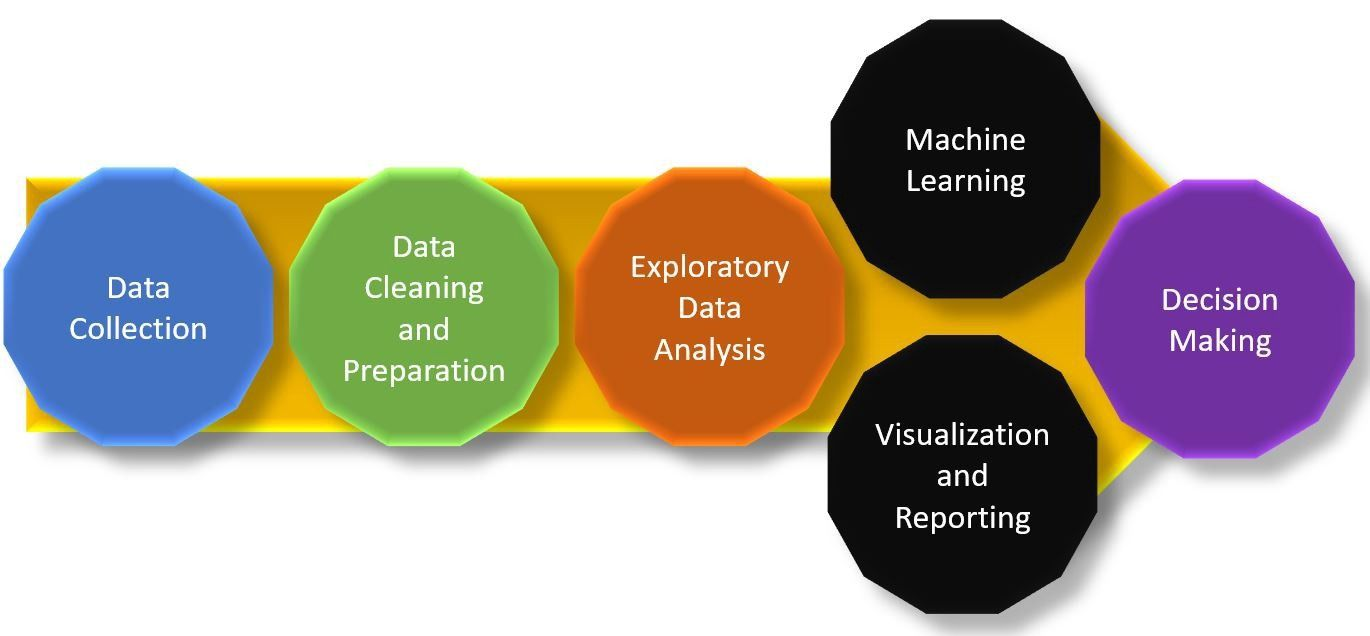

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Loading the Dataset </font></h3>

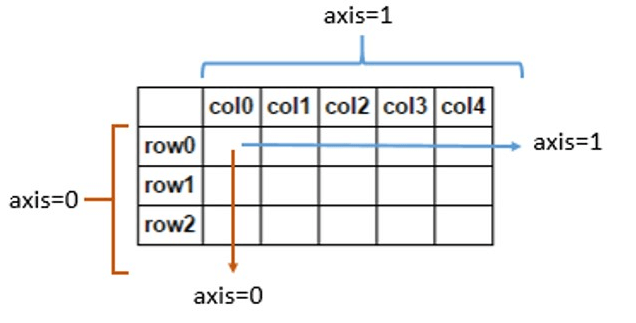

In [6]:
data = pd.read_csv('dataset.csv', index_col = 0)

In [7]:
data.head(5)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Data Cleansing </font></h3>

In [8]:
data.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,5.840788e+06,5.917089e+06,5.851117e+06,5.781311e+06,5.929933e+06,5.800716e+06,5.907027e+06,5.767686e+06,5.757440e+06,5.777951e+06,5.759424e+06,5.792981e+06,5.899017e+06,5.847259e+06,5.955172e+06,5.788609e+06,5.927114e+06,5.857239e+06,5.842323e+06,5.956842e+06
mean,7.445373e+00,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,1.803459e+00,1.460764e+02,4.249974e+02,3.255738e+00,1.092802e-01,2.671454e+02,1.912982e+01,6.000324e+01,1.573227e+01,1.150404e+01,3.030552e-01
std,8.881665e-01,4.799915e-01,3.256667e+00,6.842828e+01,3.250641e-02,1.546368e+00,9.258807e-01,8.247870e-01,5.965534e-01,1.069586e+00,6.879844e+01,1.899937e+02,7.328441e-01,4.761827e-01,1.558586e+02,1.136623e+01,1.809977e+01,8.794391e+00,6.922858e+00,4.595789e-01
min,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.894328e+00,9.992949e-06,3.973078e+00,1.381341e+02,1.500283e-122,4.148202e-01,3.872368e-02,3.749503e-01,1.288629e-01,8.921019e-01,9.777114e+01,2.864261e+02,2.744504e+00,2.522376e-06,1.329157e+02,1.134879e+01,4.779120e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,7.449564e+00,2.249640e-03,5.604051e+00,1.760178e+02,2.213625e-62,1.081818e+00,2.097680e-01,7.751792e-01,3.479592e-01,1.774284e+00,1.346489e+02,3.970808e+02,3.209748e+00,6.481943e-04,2.658880e+02,1.644428e+01,5.999681e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,8.014424e+00,5.455290e-02,7.672402e+00,2.179811e+02,3.592165e-27,2.230841e+00,6.249132e-01,1.341508e+00,7.010104e-01,2.654286e+00,1.817703e+02,5.333489e+02,3.705217e+00,1.672082e-02,3.984954e+02,2.383543e+01,7.221235e+01,2.300000e+01,1.800000e+01,1.000000e+00
max,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,4.141998e+00,1.434587e+03,2.271632e+03,1.256663e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,3.100000e+01,2.300000e+01,1.000000e+00


In [9]:
data.isna().sum()

pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Filling all the Null Values Using Forward Fill Method </font></h3>

<i>- Since there is such high standard deviation in the dataset i.e. the values are spread over wider range. So instead of filling null values by mean of a column we are using forward fill method.</i>

In [10]:
data.fillna(method='ffill', inplace=True)

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Converting all the Columns of String Data Type to Integer Type Using Factorization Method </font></h3>

<i>- We are converting all the categorical columns into numerical data type so we can use it for training our model. Since machine learning model only accepts numerical values.</i>




In [11]:
df_numeric = data.select_dtypes(exclude=['object'])
df_obj = data.select_dtypes(include=['object']).copy()
    
for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

data = pd.concat([df_obj,df_numeric], axis=1)

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Correlation Matrix </font></h3>


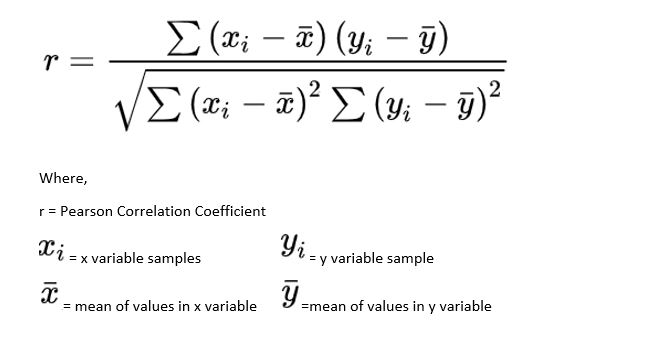

In [12]:
data.corr(method='pearson').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Color,Source,Month,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
Color,1.0,0.000479,-0.000313,-0.00791,0.0425,0.0417,0.0514,0.00984,0.0205,0.0564,0.0422,0.0535,0.0406,0.0316,-4.98e-05,0.0369,0.0465,0.0233,-0.000909,-0.000538,0.000675,-6.49e-06,0.147
Source,0.000479,1.0,-1.23e-05,0.000656,0.000114,0.000529,0.000452,0.000471,2.02e-05,-0.000231,0.000387,0.000304,-0.000173,-0.000307,6.98e-05,0.000541,-0.000126,0.000459,-0.000106,0.000491,0.000393,0.000362,-4.74e-05
Month,-0.000313,-1.23e-05,1.0,-0.000285,-0.000142,0.000123,8.18e-05,0.00021,-0.000125,-0.000425,0.000147,0.000215,0.000335,0.000173,0.000414,0.000908,-0.000388,-0.000138,0.000282,0.000392,-0.00596,0.000222,-3.96e-05
pH,-0.00791,0.000656,-0.000285,1.0,-0.00978,-0.00946,-0.0124,-0.00232,-0.00502,-0.0136,-0.0101,-0.0133,-0.0094,-0.00713,0.000353,-0.00774,-0.0111,-0.00522,-0.000399,0.000521,0.000843,-0.000113,-0.0347
Iron,0.0425,0.000114,-0.000142,-0.00978,1.0,0.0516,0.0637,0.0109,0.0252,0.0694,0.0519,0.0673,0.0497,0.0404,0.000269,0.045,0.0588,0.0284,0.000868,-0.000391,-9.22e-05,0.000339,0.181
Nitrate,0.0417,0.000529,0.000123,-0.00946,0.0516,1.0,0.0637,0.0114,0.0249,0.0703,0.052,0.0666,0.0494,0.0392,0.000164,0.0452,0.0581,0.029,-0.00013,0.000261,-6.66e-05,-4.43e-05,0.183
Chloride,0.0514,0.000452,8.18e-05,-0.0124,0.0637,0.0637,1.0,0.0139,0.0303,0.0854,0.0636,0.0808,0.0613,0.0477,-0.000539,0.055,0.0701,0.036,-0.000325,-0.000247,0.000135,-0.000273,0.223
Lead,0.00984,0.000471,0.00021,-0.00232,0.0109,0.0114,0.0139,1.0,0.00582,0.0165,0.0131,0.0153,0.0113,0.00912,-0.000103,0.0105,0.0135,0.00585,-0.000107,-0.000485,0.000188,0.000586,0.042
Zinc,0.0205,2.02e-05,-0.000125,-0.00502,0.0252,0.0249,0.0303,0.00582,1.0,0.0338,0.0243,0.0323,0.0245,0.0192,-3.83e-05,0.0217,0.0272,0.0138,-0.000402,2.85e-05,0.000218,0.000659,0.0884
Turbidity,0.0564,-0.000231,-0.000425,-0.0136,0.0694,0.0703,0.0854,0.0165,0.0338,1.0,0.0693,0.0887,0.0663,0.0525,5.3e-05,0.062,0.0764,0.0389,0.000241,-0.000864,-0.000268,-0.00102,0.245


In [13]:
df_correlation = data.corr()

<AxesSubplot:>

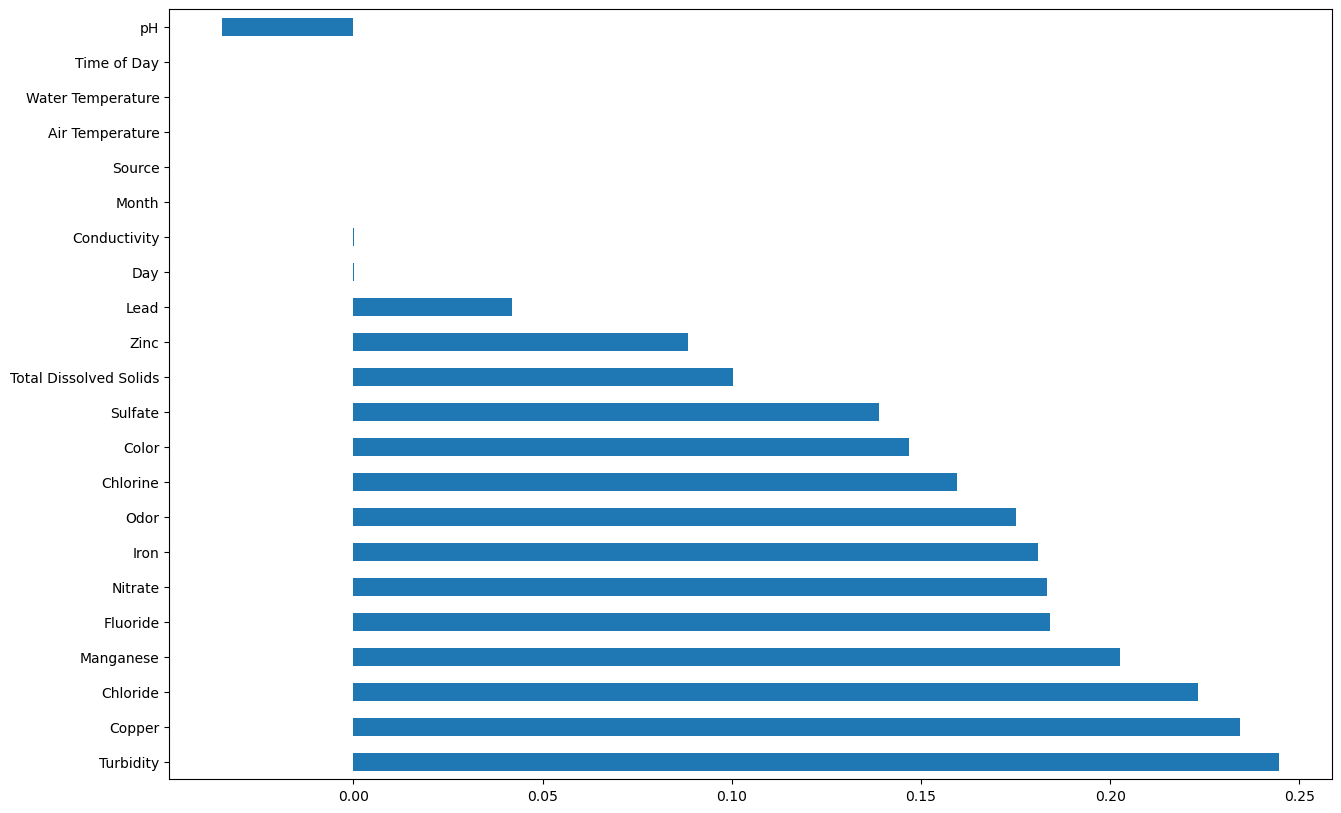

In [14]:
plt.rcParams['figure.figsize'] = [15, 10]
(df_correlation
     .Target
     .drop('Target') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [15]:
data.corr()['Target'].sort_values()

pH                       -0.034737
Time of Day              -0.000232
Water Temperature        -0.000113
Air Temperature          -0.000048
Source                   -0.000047
Month                    -0.000040
Conductivity              0.000078
Day                       0.000241
Lead                      0.042007
Zinc                      0.088429
Total Dissolved Solids    0.100231
Sulfate                   0.138839
Color                     0.146770
Chlorine                  0.159533
Odor                      0.175152
Iron                      0.180897
Nitrate                   0.183399
Fluoride                  0.184089
Manganese                 0.202702
Chloride                  0.223133
Copper                    0.234398
Turbidity                 0.244534
Target                    1.000000
Name: Target, dtype: float64

In [16]:
cor = data.corr()['Target'].sort_values()

In [17]:
df = data.copy()

<h3><font color='blue'> Removing all the Columns from the Dataset whose Correlation Value is Less than 0.01 with the Target Column </font></h3>
<i>- Since columns with such low correlation with not be useful for predicting the target column. So we will be dropping through column while training the predictive model</i>

In [18]:
arr = []
for k, v in cor.items():
    if abs(v) < 0.01:
        arr.append(k)

In [19]:
df = df.drop(arr, axis=1)

In [20]:
df.head(5)

,Color,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target
Index,,,,,,,,,,,,,,,,
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,3.560224,7.007989e-02,570.054094,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,0.166319,0.208454,0.239451,3.414619,147.163233,3.516907,2.468295e-02,100.043838,0
4,2,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,0


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> BoxPlot ( Pictorial View of all the Outliers in the Data ) </font></h3>

<AxesSubplot:>

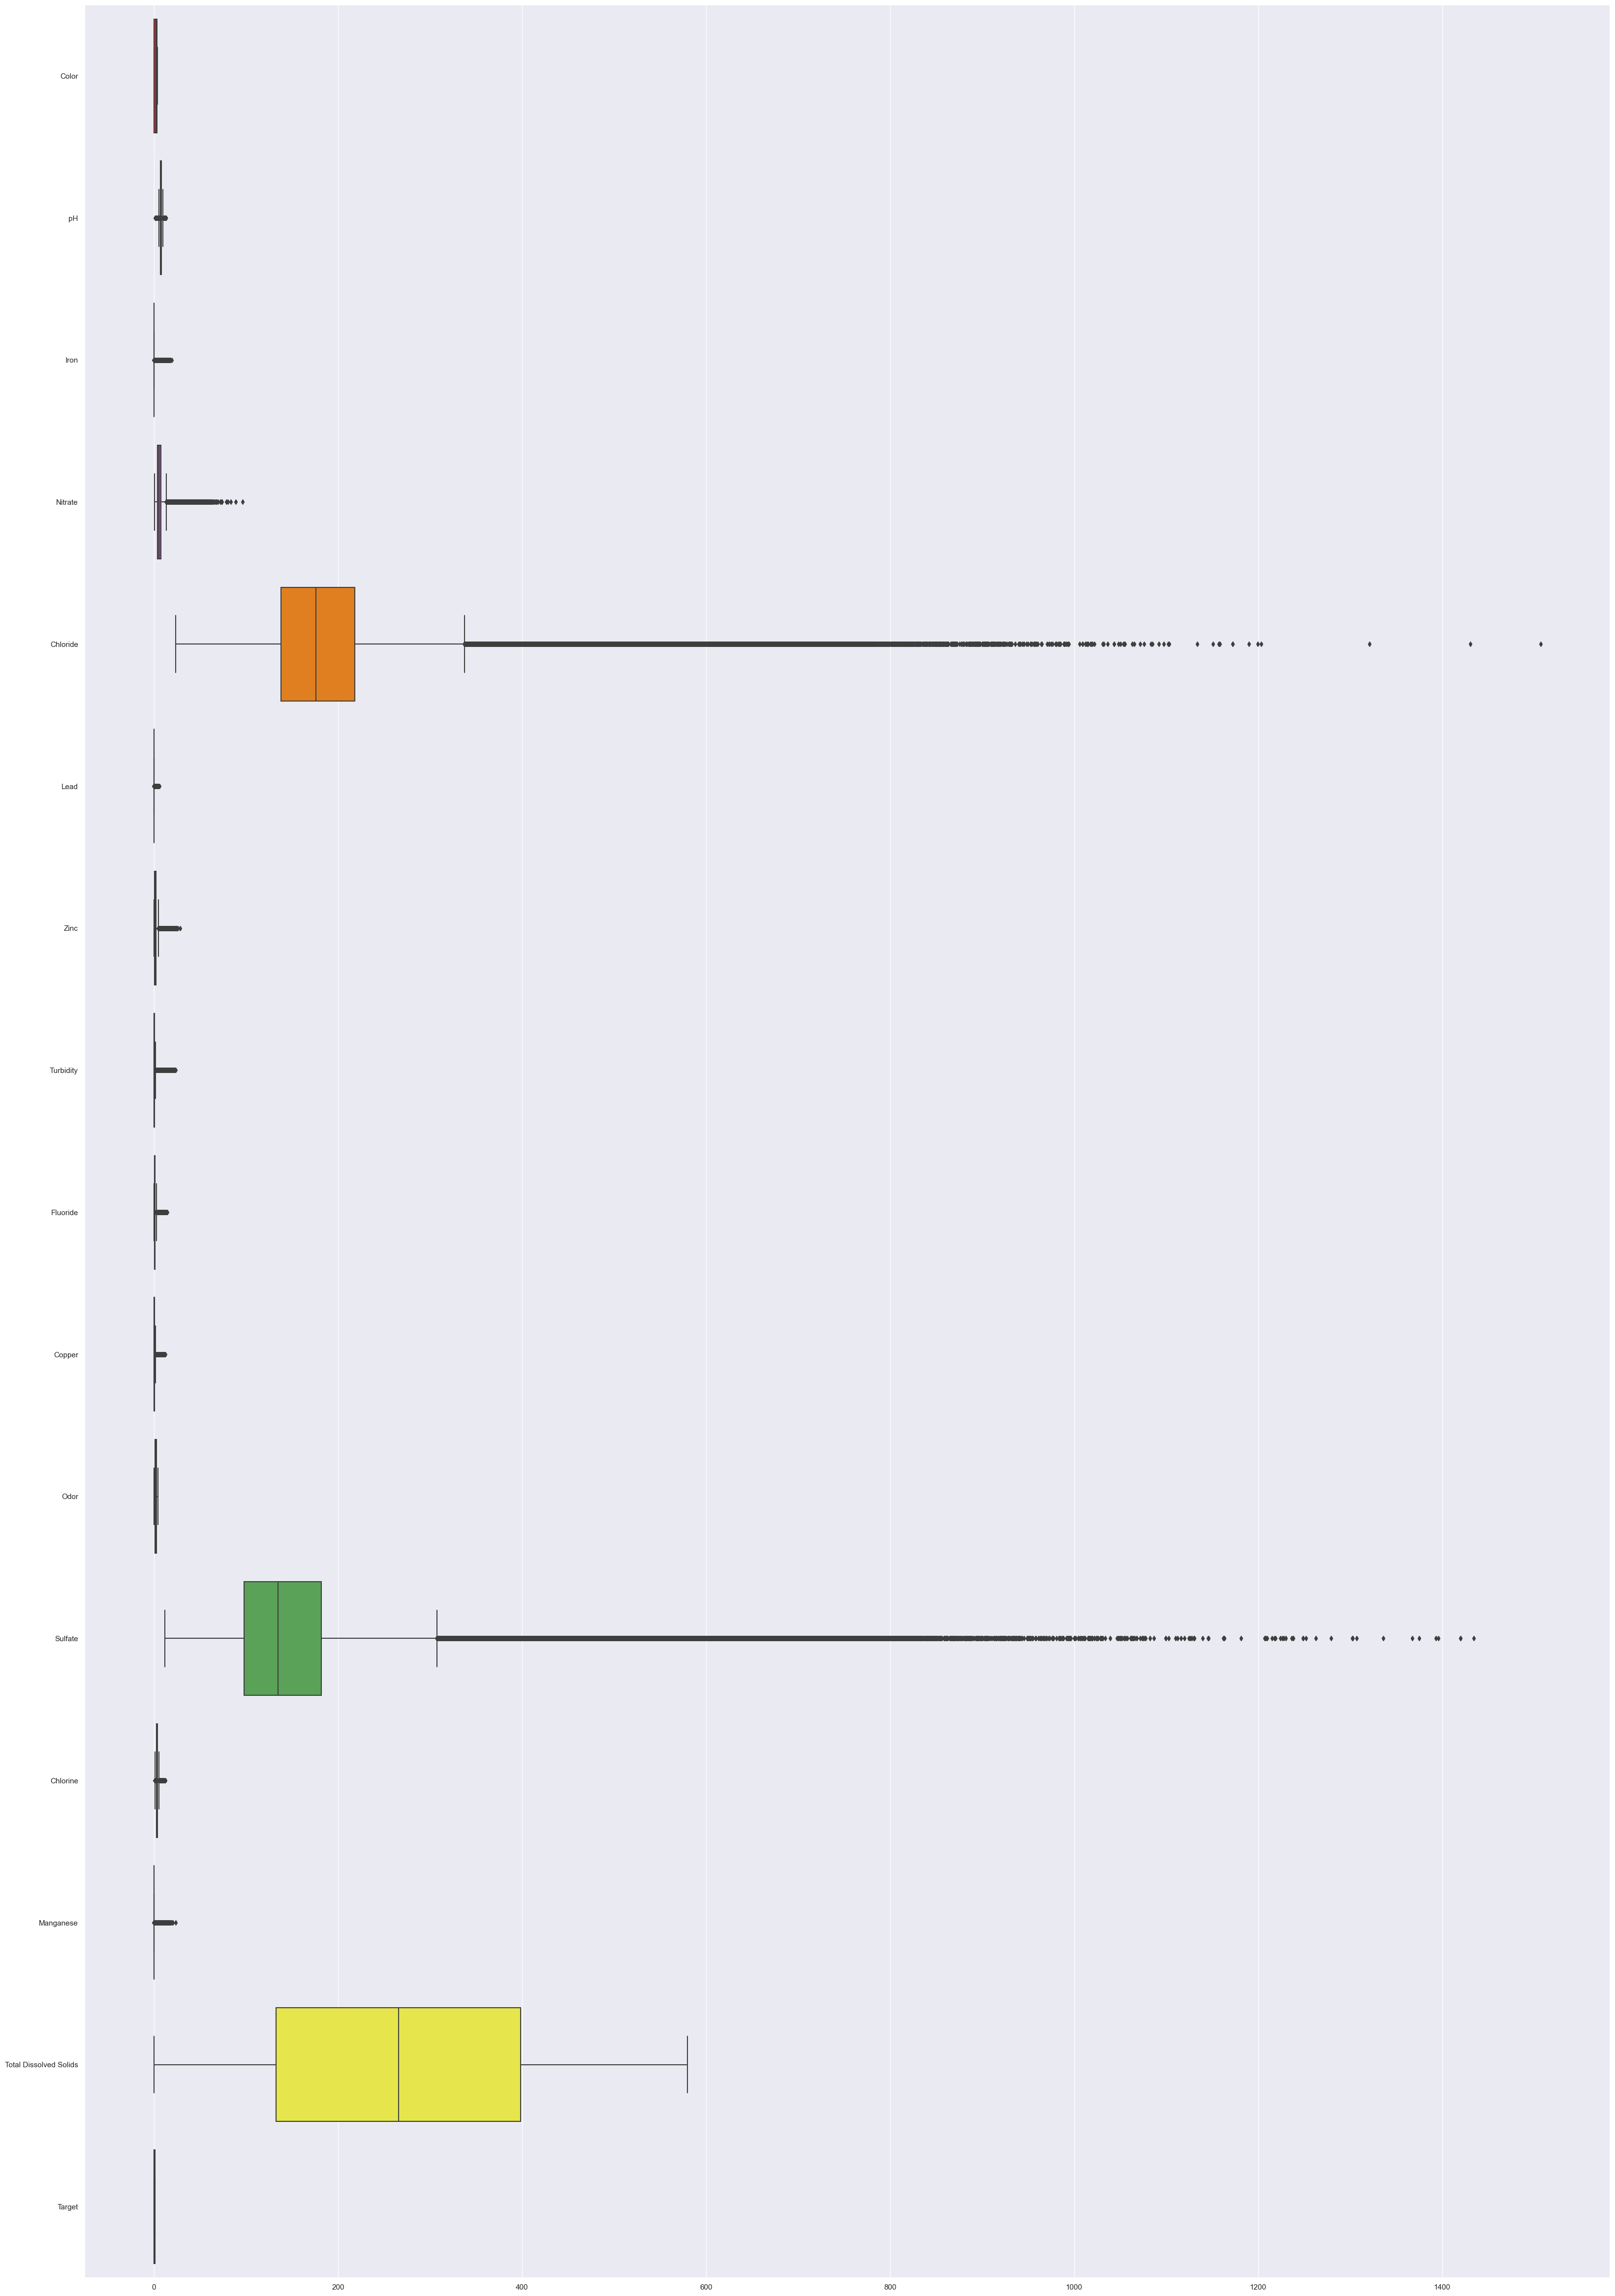

In [21]:
sns.set(rc={'figure.figsize':(40,60)})
sns.boxplot(data=df, orient="h", palette="Set1")

<h3><font color='blue'> Removing all the Outliers from the Dataset </font></h3>

<i>- Since outliers can skew the results of the predictive model. It is better to remove those from the dataset.</i>

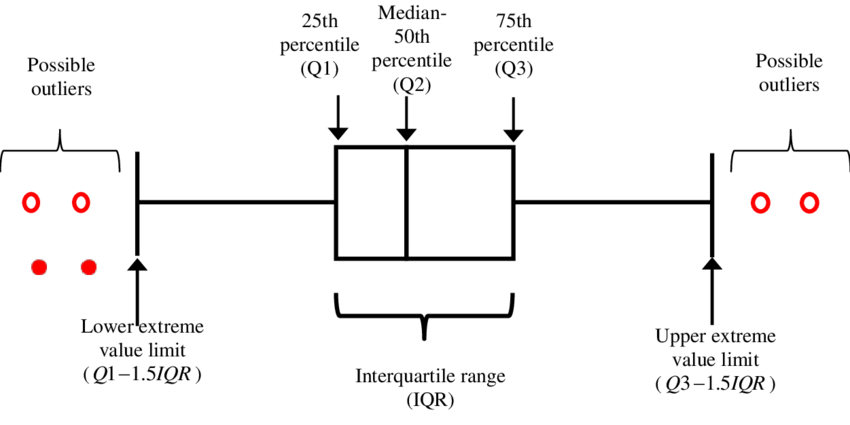

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [23]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Color                           0
pH                         157706
Iron                       955610
Nitrate                    196950
Chloride                   193937
Lead                      1468591
Zinc                       184256
Turbidity                  464338
Fluoride                   207346
Copper                     318721
Odor                            0
Sulfate                    151300
Chlorine                   101584
Manganese                  954536
Total Dissolved Solids          0
Target                          0
dtype: int64

In [24]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(2698298, 16)

In [25]:
data.shape

(5956842, 23)

In [26]:
df.head(5)

,Color,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target
Index,,,,,,,,,,,,,,,,
0,0,8.332988,8.347252e-05,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0
1,1,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,0
4,2,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,0
6,2,8.132455,5.526229e-02,4.288010,94.993978,2.919909e-52,1.770221,0.021703,1.111893,0.247116,0.426404,40.853403,1.706755,3.083768e-02,266.079565,0
7,0,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,0.047803,1.016196,0.298093,3.144199,114.551427,2.325094,6.020680e-16,214.553104,0


In [27]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Standardizing all The Columns which will be used for Training the Model </font></h3>

<i>- Strandardizing the columns so some of the machine learning model which assign weights to each column while training should not provide higher weight to a column just based on the magnitude of their value.</i>

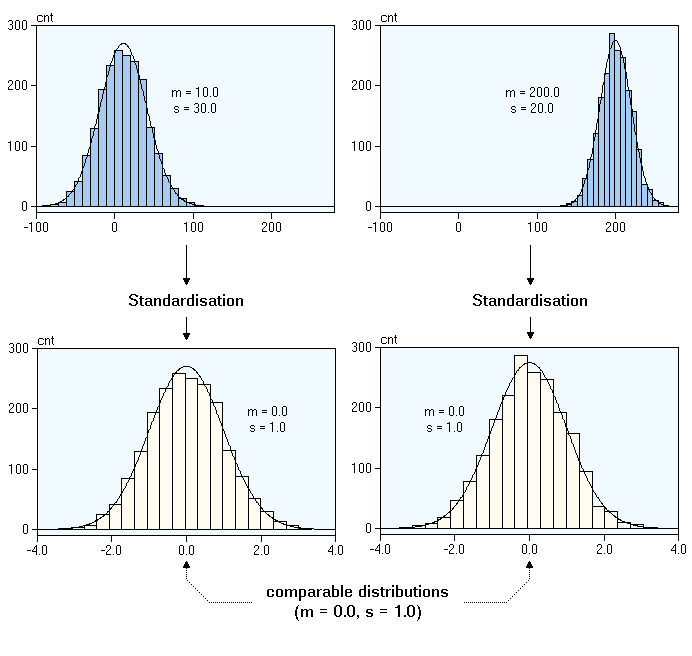

In [28]:
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Linear Regression </font></h3>

In [30]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

In [31]:
pred = regressor.predict(x_test)

In [32]:
accuracy = regressor.score(x_test, y_test)
print(f'Accuracy of Logistic Regression Model is {round(accuracy * 100, 2)} %')

Accuracy of Logistic Regression Model is 90.47 %


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> XG Boost </font></h3>

In [33]:
model = XGBClassifier()

In [34]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
pred = model.predict(x_test)

In [36]:
accuracy_xgb = model.score(x_test, y_test)
print(f'Accuracy of XG Boost Model is {round(accuracy_xgb * 100, 4)} %')

Accuracy of XG Boost Model is 94.7163 %


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Light GBM </font></h3>

In [37]:
model_lgbm = LGBMClassifier()

In [38]:
model_lgbm.fit(x_train, y_train)

LGBMClassifier()

In [39]:
pred_new = model_lgbm.predict(x_test)

In [40]:
accuracy_lgbm = model_lgbm.score(x_test, y_test)
print(f'Accuracy of Light Gradient Boost Model is {round(accuracy_lgbm * 100, 4)} %')

Accuracy of Light Gradient Boost Model is 95.003 %


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> CAT Boost </font></h3>

In [41]:
model_cat = CatBoostClassifier(verbose=0, n_estimators=100)

In [42]:
model_cat.fit(x_train, y_train)

In [43]:
predictions = model_cat.predict(x_test)

In [44]:
accuracy_cbm = model_cat.score(x_test, y_test)
print(f'Accuracy of Light Gradient Boost Model is {round(accuracy_cbm * 100, 4)} %')

Accuracy of Light Gradient Boost Model is 94.7898 %


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Light GBM is giving the best accuracy amongst all the models </font></h3>

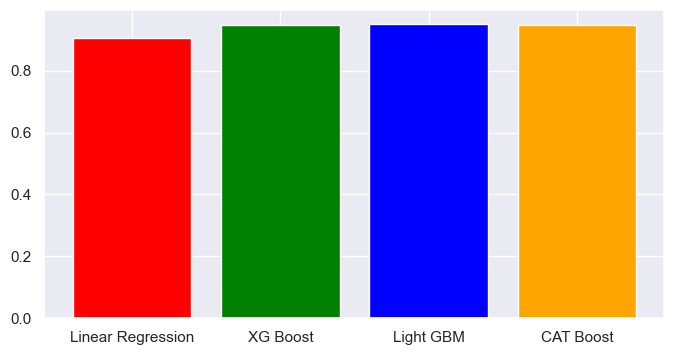

In [51]:
x = ['Linear Regression', 'XG Boost', 'Light GBM', 'CAT Boost']
y = [accuracy, accuracy_xgb, accuracy_lgbm, accuracy_cbm]
colors = ['red', 'green', 'blue', 'orange']
plt.rcParams['figure.figsize'] = [8,4]
plt.bar(x, y, color=colors)
plt.show()

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'>  Run Below Four Cells after Running all the Imports to get the Accuracy from the Final Selected Model </font></h3>

In [46]:
def preprocessing(dataset_path):
    
    data = pd.read_csv(dataset_path , index_col = [0])
    data.fillna(method='ffill', inplace=True)
    
    df_numeric = data.select_dtypes(exclude=['object'])
    df_obj = data.select_dtypes(include=['object']).copy()
    
    for c in df_obj:
        df_obj[c] = pd.factorize(df_obj[c])[0]

    data = pd.concat([df_obj,df_numeric], axis=1)
    
    cor = data.corr()['Target'].sort_values()
    df = data.copy()
    arr = []
    for k, v in cor.items():
        if abs(v) < 0.01:
            arr.append(k)
    df = df.drop(arr, axis=1)
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    x = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    sc_X = StandardScaler()
    x = sc_X.fit_transform(x)
    
    return x, y

In [47]:
x, y = preprocessing('dataset.csv')

In [48]:
def training(x, y):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    model = LGBMClassifier()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    f1 = f1_score(y_test, pred)
    return f1, accuracy

In [49]:
F1, Accuracy = training(x, y)

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'>  We are able to achieve 95.003 % Accuracy in this problem statement  </font></h3>

In [50]:
print(f'Accuracy of the Model is {round(Accuracy * 100, 4)} %')

Accuracy of the Model is 95.003 %
